# Projet Machine Learning : Kannada Mnist
Auteur : **Cyrus KOUASSI & Ismael AHAMADI**

Formation : Master 2 Mathématiques appliquées Statistiques, Université Clermont Auvergne

Année Scolaire : 2025-2026

# Introduction 

La reconnaissance automatique de chiffres manuscrits constitue un problème fondamentale en apprentissage automatique et en vision par ordinateur. Elle repose sur la capacité d’un modèle à identifier des motifs visuels à partir d’images et à les associer correctement à une classe donnée.  Cette problématique occupe une place importante dans la littérature scientifique, notamment en raison de ses nombreuses applications concrètes telles que la lecture automatique de formulaires, la numérisation de documents ou encore l’automatisation de processus bancaires.

Parmi les jeux de données de référence utilisés pour ce type d’étude, le dataset MNIST occupe une place centrale. Dans ce projet, nous travaillons sur une variante spécifique, **Kannada MNIST**, qui propose des chiffres manuscrits en Kannada, une langue parlée principalement dans le sud de l’Inde par environ 45 millions de personnes.

Notre travail suivra une progression structurée, allant de l’analyse des données à l’évaluation finale des modèles, selon les étapes suivantes :

- 1. Présentation des objectifs du projet et description détaillée des données

- 2. Analyse exploratoire et visualisation des données

- 3. Division du jeu de données en ensembles d’apprentissage et de validation 

- 4. Mise en œuvre de plusieurs modèles de classification, dont au moins un modèle ensembliste, avec optimisation des hyperparamètres par validation croisée 

- 5. Évaluation du modèle retenu et discussion critique des performances obtenues.
 

L’**objectif** de ce travail est donc de  concevoir et comparer plusieurs modèles de classification supervisée afin d’identifier l’approche la plus performante pour la reconnaissance de chiffres manuscrits Kannada.

# I. Présentation des objectifs du projet et description détaillée des données

- **Objectif** 

L’objectif principal du projet est de concevoir, entraîner et évaluer un modèle de Machine Learning capable de classifier automatiquement des images de chiffres manuscrits en dix classes distinctes, correspondant aux chiffres de 0 à 9. Il s’agit d’un problème de classification supervisée multi-classes dans lequel chaque observation correspond à une image et la variable cible indique le chiffre représenté.

- **Source des données**

Les données utilisées proviennent de la plateforme Kaggle et sont accessibles via le lien suivant : https://www.kaggle.com/c/Kannada-MNIST/data. 

- **Description du jeu de données**

Le jeu de données est fourni sous forme de fichiers au format CSV, dans lesquels chaque image est représentée par une matrice de pixels préalablement aplatie en un vecteur numérique. Cette structuration permet de traiter les images comme des observations tabulaires classiques dans un cadre d’apprentissage supervisé.
Chaque image est de dimension 28 × 28 pixels, soit un total de 784 pixels. Les images sont codées en niveaux de gris, chaque pixel prenant une valeur entière comprise entre 0 et 255, représentant l’intensité lumineuse. Ainsi, chaque observation est décrite par **784 variables numériques** correspondant aux valeurs des pixels.

Le dataset se compose de deux fichiers principaux :

    - train.csv : contient les données utilisées pour l’entraînement des modèles

    - test.csv : contient les observations destinées à l’évaluation des performances du modèle

Le fichier d’entraînement contient une colonne supplémentaire nommée label, qui indique la classe associée à l’image. Les 784 colonnes restantes correspondent aux pixels de l’image. De plus, chaque colonne de pixels porte un nom comme pixel{x}, où x est un entier compris entre 0 et 783, inclus. Le fichier de test possède une structure similaire, à l’exception de la variable cible, absente dans ce cas. Il permet d’évaluer la capacité de généralisation du modèle sur des données non observées durant l’apprentissage.

Ce cadre pose plusieurs défis techniques, notamment la gestion d’un espace de grande dimension, le risque de surapprentissage et la nécessité de capturer correctement les variations d’écriture manuscrite propres à la graphie Kannada.

# II. Analyse exploratoire et visualisation des données

Avant la mise en œuvre des modèles de classification, une analyse exploratoire des données est conduite afin d’évaluer leur structure, la distribution des intensités de pixels et l’équilibre des classes. Cette étape permet de mieux comprendre la nature des variables et d’orienter les choix méthodologiques pour la suite du projet.

In [105]:
# Bibliothèques

# Manipulation de données
import numpy as np
import pandas as pd

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn : préparation, modèles, évaluation
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Distributions pour RandomizedSearch
from scipy.stats import randint, loguniform

# Reproductibilité
np.random.seed(42)

In [107]:
# Chargements des données MNIST
# Les fichiers doivent être dans le même dossier que le notebook
kannada_train = pd.read_csv("train.csv")
kannada_test  = pd.read_csv("test.csv")

In [108]:
# information sur les données 
print("Informations sur le dataset train :")
kannada_train.info()

print("\nInformations sur le dataset test :")
kannada_test.info()

Informations sur le dataset train :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 359.3 MB

Informations sur le dataset test :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 785 entries, id to pixel783
dtypes: int64(785)
memory usage: 29.9 MB


### II.B. Analyse statistique des intensités de pixels

In [110]:
# Aperçu général
print("\nPremières lignes du jeu d'entraînement :")
print(kannada_train.head())

#print("\nPremières lignes du jeu de test :")
#print(kannada_test.head())


Premières lignes du jeu d'entraînement :
   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      0       0       0       0       0       0       0       0       0   
1      1       0       0       0       0       0       0       0       0   
2      2       0       0       0       0       0       0       0       0   
3      3       0       0       0       0       0       0       0       0   
4      4       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782 

In [114]:
# Dimensions des données 
print("Dimensions des données :")
print("Train :", kannada_train.shape)
print("Test  :", kannada_test.shape)


Dimensions des données :
Train : (60000, 785)
Test  : (5000, 785)


In [116]:
## Description des tables 
kannada_train.describe()

# Statistiques descriptives - Jeu de test
# kannada_test.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.000000,60000.0
mean,4.500000,0.0,0.0,0.0,0.0,0.0,0.008817,0.029467,0.037767,0.075933,...,0.015583,0.016450,0.013417,0.022300,0.012217,0.001383,0.003783,0.0,0.002717,0.0
std,2.872305,0.0,0.0,0.0,0.0,0.0,1.474271,2.700491,2.726371,3.993023,...,1.443852,1.958914,1.342572,2.051846,1.730959,0.338846,0.926724,0.0,0.665445,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
50%,4.500000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,157.000000,255.000000,255.000000,83.000000,227.000000,0.0,163.000000,0.0


In [117]:
# Vérification des valeurs manquantes
print("\nNombre total de valeurs manquantes (train) :", kannada_train.isnull().sum().sum())

print("Nombre total de valeurs manquantes (test) :",  kannada_test.isnull().sum().sum())


Nombre total de valeurs manquantes (train) : 0
Nombre total de valeurs manquantes (test) : 0


L’ensemble d’entraînement comprend **60 000 observations** et celui de test **5 000** réparties en 10 classes de chiffre en format 1D. La moyenne faible des pixels reflète la dominance du fond sombre, tandis que leur variabilité permet de discriminer les classes. Enfin, **aucune valeur manquante** n’est détectée, ce qui garantit l’intégrité du jeu de données.

### II.B. Analyse de la distribution des classes

/var/folders/jy/7z75rm994b52gc57kcl9jhr40000gn/T/ipykernel_87500/1414249446.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=kannada_train, palette='viridis')


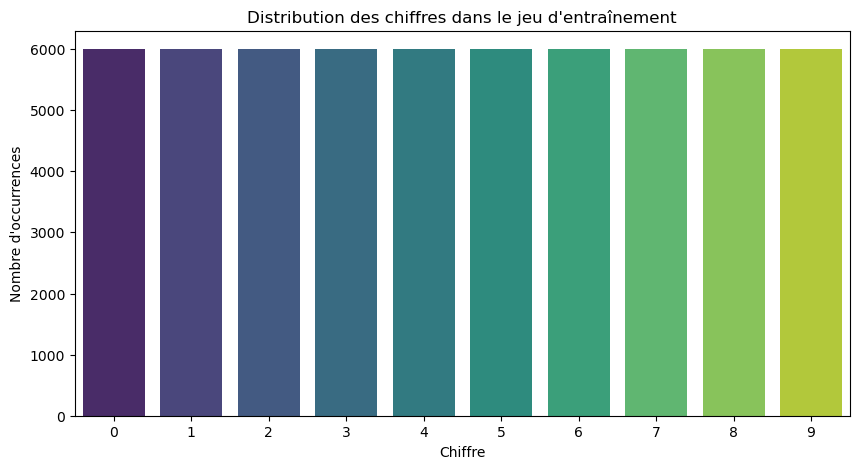

Fréquence par classe :
label
0    10.0
1    10.0
2    10.0
3    10.0
4    10.0
5    10.0
6    10.0
7    10.0
8    10.0
9    10.0
Name: proportion, dtype: float64


In [122]:
plt.figure(figsize=(10, 5))
sns.countplot(x='label', data=kannada_train, palette='viridis')
plt.title('Distribution des chiffres dans le jeu d\'entraînement')
plt.xlabel('Chiffre')
plt.ylabel('Nombre d\'occurrences')
plt.show()

# Calcul des fréquences exactes
print("Fréquence par classe :")
print(kannada_train['label'].value_counts(normalize=True) * 100)

On observe que les classes sont **parfaitement équilibrées** (6000 images par chiffre). Cela simplifie l'entraînement car nous n'aurons pas besoin de techniques de rééquilibrage de classes.

### II.C. Visualisation des images du jeu d’entraînement

Chaque image est initialement représentée sous forme d’un vecteur de 784 valeurs correspondant aux pixels. Les images sont codées en niveaux de gris, avec des intensités comprises entre 0 (noir) et 255 (blanc).
La conversion en matrice 28×28 (784 = 28 × 28) permet donc de reconstituer la structure spatiale originale de l’image, nécessaire pour une visualisation correcte et pour certains modèles exploitant la proximité entre pixels.

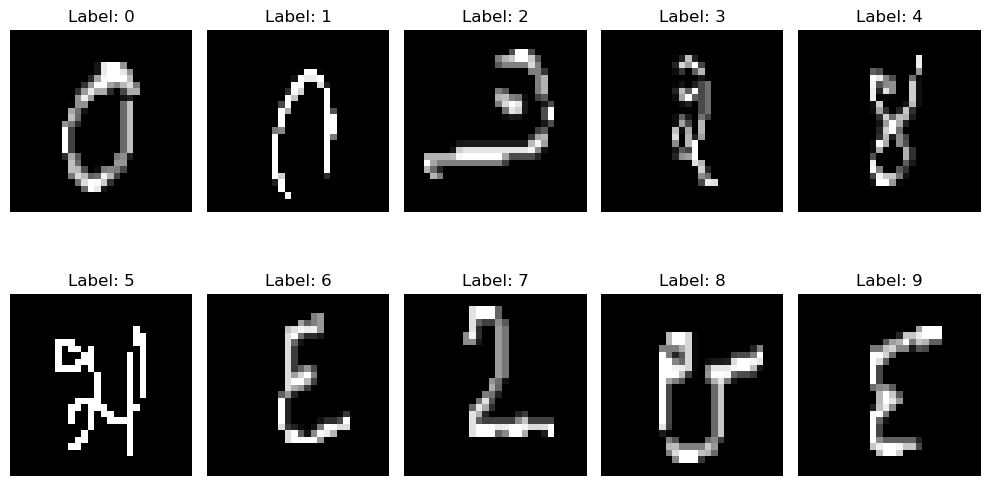

In [127]:
# Séparation pour visualisation
labels = kannada_train["label"]
pixels = kannada_train.drop("label", axis=1)

plt.figure(figsize=(10,6))

for i in range(10):
    image = pixels.iloc[i].values.reshape(28,28)
    
    plt.subplot(2,5,i+1)
    plt.imshow(image, cmap="gray")
    plt.title(f"Label: {labels.iloc[i]}")
    plt.axis("off")

plt.tight_layout()
plt.show()


L’affichage de plusieurs observations permet de constater la variabilité des formes manuscrites, ce qui justifie l’utilisation de modèles capables de capturer des motifs visuels complexes.

### **Distribution des intensités des pixels**

Min pixel : 0
Max pixel : 255
Moyenne pixel : 20.98506292517007
Écart-type pixel : 61.651160617260885


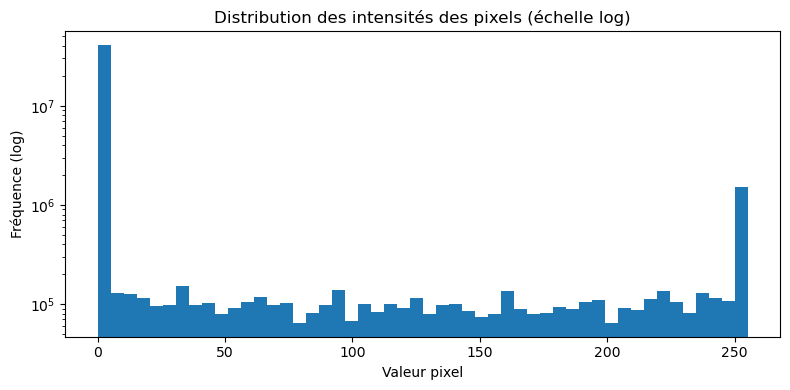

In [131]:
plt.figure(figsize=(8,4))
plt.hist(pixels.values.flatten(), bins=50, log=True)
plt.title("Distribution des intensités des pixels (échelle log)")
plt.xlabel("Valeur pixel")
plt.ylabel("Fréquence (log)")
plt.tight_layout()
plt.show

print("Min pixel :", pixels.values.min())
print("Max pixel :", pixels.values.max())
print("Moyenne pixel :", pixels.values.mean())
print("Écart-type pixel :", pixels.values.std())

L’analyse des intensités des pixels montre une forte concentration autour de la valeur 0, ce qui correspond au fond noir des images.
La moyenne des intensités est relativement faible (≈21), confirmant que la majorité des pixels ne contiennent pas d’information discriminante.

Les valeurs sont comprises entre 0 et 255, ce qui justifie une **normalisation** avant l’entraînement des modèles de machine learning.

# III. Division du jeu de données en ensembles d’apprentissage et de test
Le dataset est fourni sous forme de deux fichiers distincts, un ensemble d’entraînement et un ensemble de test. 
Une **séparation stratifiée** interne (80 % apprentissage, 20 % validation) est réalisée à partir du jeu d’entraînement afin d’évaluer les performances durant la phase de sélection du modèle. Le fichier test serautilisé pour appliquer le meilleur modèle obtenu.

In [187]:

# Extraction de la variable cible (première colonne)
y = kannada_train.iloc[:, 0].to_numpy()

# Extraction des variables explicatives (pixels)
X = kannada_train.iloc[:, 1:].to_numpy()

# Séparation stratifiée : 80 % apprentissage / 20 % validation
X_train, X_val, y_train, y_val = train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  stratify=y, #proportions des classes conservées
                                                  random_state=42) # Reproductibilite

# Dimensions des ensembles
print("X_train :", X_train.shape)
print("X_val   :", X_val.shape)

# Extraction des données du fichier de test (sans labels)
test_id = kannada_test.iloc[:, 0].to_numpy()
X_test = kannada_test.iloc[:, 1:].to_numpy()

print("X_test :", X_test.shape)

X_train : (48000, 784)
X_val   : (12000, 784)
X_test : (5000, 784)


# IV. Implémentation et comparaison de modèles de classification

L’objectif du projet étant de classifier correctement les caractères manuscrits, il est nécessaire d’entraîner des modèles supervisés capables d’apprendre une frontière de décision à partir des intensités des pixels.

Afin d’adopter une démarche expérimentale rigoureuse, nous comparons deux approches reposant sur des principes différents :

- un modèle ensembliste : Random Forest

- un modèle à marge maximale : Support Vector Machine (SVM) 

Cette comparaison permet d’évaluer l’impact de leurs hypothèses d’apprentissage sur la performance en classification. Les hyperparamètres de chaque modèle sont optimisés par validation croisée stratifiée, garantissant une estimation robuste des performances tout en évitant le surapprentissage.

## Modèle 1 : Random Forest
La Random Forest (forêt aléatoire) est un modèle ensembliste basé sur l’agrégation d’un grand nombre d’arbres de décision. Le principe général est de réduire la variance d’un arbre unique en combinant plusieurs arbres entraînés de manière diversifiée.

La diversité des arbres est obtenue grâce à deux mécanismes :

- Bootstrap (Bagging) : chaque arbre est entraîné sur un échantillon aléatoire du jeu d’entraînement, tiré avec remise.

- Sous-échantillonnage aléatoire des variables : à chaque nœud, l’arbre ne teste qu’un sous-ensemble aléatoire de variables (pixels), ce qui réduit la corrélation entre les arbres.

En classification, la prédiction finale est obtenue par vote majoritaire des arbres. Random Forest est particulièrement adaptée aux données tabulaires et présente plusieurs avantages, robustesse, bonne généralisation, et absence de besoin de normalisation. Les hyperparamètres principaux contrôlent la complexité (profondeur des arbres, taille minimale des feuilles) et la diversité (nombre d’arbres, nombre de variables testées à chaque split).

### 1. Construction du modèle 
Le modèle est construit en intégrant une phase d’optimisation des hyperparamètres par validation croisée afin d’identifier la configuration la plus performante.

Compte tenu du volume des données (60 000 images), cette optimisation est réalisée sur un sous-ensemble stratifié de 12 000 observations afin de réduire le temps de calcul. Une fois les meilleurs hyperparamètres déterminés, le modèle est ré-entraîné sur l’ensemble complet des données d’apprentissage pour l’évaluation finale.

In [139]:
# Définition de l’espace d’hyperparamètres
param_distributions = {"n_estimators": randint(200, 500),       # Nombre d’arbres composant la forêt
                        "max_depth": [15, 20, 25, None],        # Profondeur maximale des arbres
                        "min_samples_split": randint(2, 15),    # Minimum d’échantillons pour diviser un nœud
                        "min_samples_leaf": randint(1, 6),      # Minimum d’échantillons par feuille
                        "max_features": ["sqrt"]                # Nombre de variables testées à chaque division
                      }
                        

# Définition du modèle Random Forest
rf_model = RandomForestClassifier(random_state=42,   # Reproductibilité
                                  n_jobs= -1)# Tous les coeurs sont utilisés)
    

# Validation croisée stratifiée
cv = StratifiedKFold(n_splits=3,
                     shuffle=True, #Conservation des proportions de classes dans chaque pli
                     random_state=42)
    

# Recherche aléatoire des hyperparamètres
random_search_rf = RandomizedSearchCV(estimator=rf_model,
                                      param_distributions=param_distributions,
                                      n_iter=10,                 # Nombre de combinaisons testées
                                      cv=cv,
                                      scoring="accuracy",        # Métrique d’évaluation
                                      n_jobs=2,
                                      random_state=42,
                                      verbose=2,
                                      return_train_score=True)
                                      
    

# Lancement de l’optimisation
random_search_rf.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_jobs=2,
                   param_distributions={'max_depth': [15, 20, 25, None],
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x15caedaf0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x15caed430>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x15caefcb0>},
                   random_state=42, return_train_score=True, scoring='accuracy',
                   verbose=2)

In [153]:
print("meilleurs hyperparamètres:", random_search_rf.best_params_)
# Récupération du meilleur modèle
best_rf_model = random_search_rf.best_estimator_

# Prédictions sur l’ensemble de validation
y_val_pred = best_rf_model.predict(X_val)

# Évaluation des performances
# Accuracy
accuracy_val = accuracy_score(y_val, y_val_pred)
print("Score moyen CV :", random_search_rf.best_score_)
print("Accuracy validation :", accuracy_val)

# Rapport détaillé (precision, recall, F1-score)
print("\nClassification report :")
print(classification_report(y_val, y_val_pred))

meilleurs hyperparamètres: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 258}
Score moyen CV : 0.9773541666666666
Accuracy validation : 0.9813333333333333

Classification report :
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1200
           1       0.98      0.99      0.99      1200
           2       1.00      0.99      1.00      1200
           3       0.96      0.98      0.97      1200
           4       0.98      0.99      0.98      1200
           5       0.99      0.99      0.99      1200
           6       0.96      0.98      0.97      1200
           7       0.98      0.96      0.97      1200
           8       1.00      0.99      0.99      1200
           9       1.00      0.97      0.98      1200

    accuracy                           0.98     12000
   macro avg       0.98      0.98      0.98     12000
weighted avg       0.98      0.98      0.98     12000



Le modèle Random Forest présente une excellente performance avec une **accuracy de 98 %** sur l’ensemble de validation. La **précision moyenne de 98 %** indique que, lorsque le modèle prédit une classe, cette prédiction est correcte dans la grande majorité des cas. Les scores étant homogènes entre les classes, cela traduit une bonne capacité de généralisation et l’absence de déséquilibre significatif dans la classification.

### 2. Matrice de confusion
La matrice de confusion permet d’analyser en détail les performances du modèle en identifiant les classes correctement prédites ainsi que les éventuelles confusions. La normalisation est réalisée afin d’exprimer les résultats en proportions, ce qui facilite la comparaison des performances entre classes indépendamment de leur effectif.

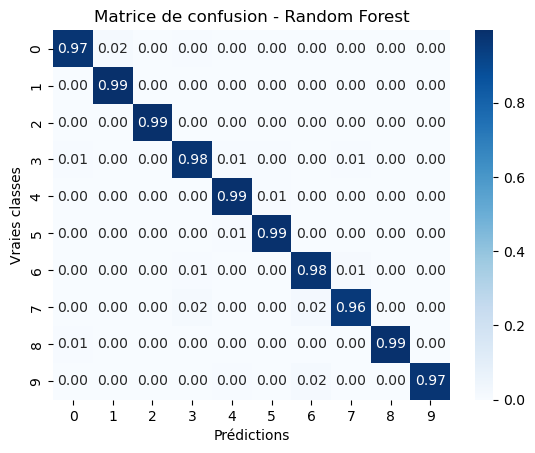

In [150]:
cm_rf = confusion_matrix(y_val, y_val_pred,normalize="true")

sns.heatmap(cm_rf, annot=True, fmt=".2f", cmap="Blues")
plt.title("Matrice de confusion - Random Forest")
plt.xlabel("Prédictions")
plt.ylabel("Vraies classes")
plt.show()

La matrice de confusion montre une forte concentration des prédictions sur la diagonale, indiquant une excellente performance globale. Les erreurs observées restent faibles (1 à 2%).

### 3. Importance des pixels
L’analyse des importances des variables permet d’identifier les pixels les plus influents dans la classification. Elle offre une interprétation du modèle en mettant en évidence les zones de l’image les plus discriminantes. Cette analyse permet également de vérifier que le modèle exploite des structures pertinentes et non du bruit

     Feature  Importance
659      659    0.012907
658      658    0.012747
461      461    0.011822
462      462    0.011340
183      183    0.010974
491      491    0.010615
657      657    0.009632
155      155    0.009452
490      490    0.009142
211      211    0.009137


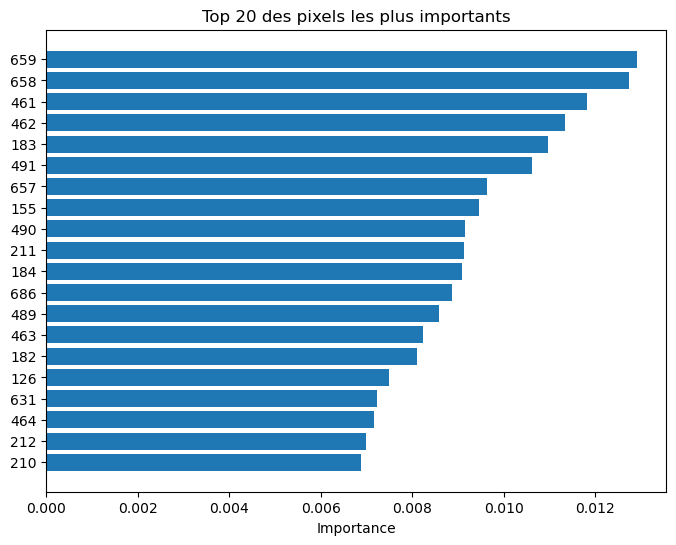

In [159]:
# Récupération des importances
importances = best_rf_model.feature_importances_

# Création d’un DataFrame pour lecture plus claire
feature_importance_df = pd.DataFrame({"Feature": np.arange(len(importances)),
                                     "Importance": importances})

# Tri décroissant
feature_importance_df = feature_importance_df.sort_values(by="Importance", ascending=False)

print(feature_importance_df.head(10))
plt.figure(figsize=(8,6))
plt.barh(feature_importance_df["Feature"].head(20).astype(str),
         feature_importance_df["Importance"].head(20))
plt.gca().invert_yaxis()
plt.xlabel("Importance")
plt.title("Top 20 des pixels les plus importants")
plt.show()

Le graphique met en évidence les 20 pixels les plus influents dans la décision du modèle Random Forest.

Les pixels **659, 658, 461** et **462** présentent les importances les plus élevées (≈ 0.012), ce qui signifie qu’ils contribuent davantage à la séparation des classes lors des divisions des arbres.

## Modèle 2 :  Support Vector Machine (SVM) 

Le Support Vector Machine (SVM) est un modèle de classification fondé sur le principe de **maximisation de la marge**. L’objectif est de déterminer l’hyperplan séparant les classes de manière à maximiser la distance entre les points les plus proches de chaque classe, appelés vecteurs supports.

Dans le cas où les données ne sont pas linéairement séparables, le SVM utilise une fonction noyau (kernel) permettant de projeter les données dans un espace de dimension plus élevée où la séparation devient possible. Cette transformation est réalisée implicitement grâce au “kernel trick”.

Les hyperparamètres principaux du SVM sont :

- **C** : paramètre de régularisation contrôlant le compromis biais–variance. Une valeur élevée de C pénalise fortement les erreurs de classification.

- **γ** (gamma) : paramètre du noyau RBF contrôlant l’influence locale des points d’apprentissage.

Le SVM est particulièrement adapté aux problèmes de classification en haute dimension, comme la reconnaissance d’images, où le nombre de variables (pixels) est élevé.

### 1. Construction du modèle 
Le modèle SVM est développé au sein d’un pipeline incluant une optimisation des hyperparamètres par validation croisée stratifiée afin d’identifier la meilleure combinaison des paramètres C et \gamma du noyau RBF.

Étant donné la dimension élevée des données (784 pixels), une normalisation ainsi qu’une réduction de dimension par ACP sont appliquées en amont. La normalisation garantit une échelle homogène des variables, tandis que l’ACP permet de conserver l’essentiel de l’information tout en diminuant le nombre de variables.

In [165]:
# normalisation des pixels
X_train = (X_train.astype(np.float32) / 255.0)
X_val   = (X_val.astype(np.float32) / 255.0)

# pipeline svm
pipe = Pipeline([("scaler", StandardScaler()),
                 ("pca", PCA(svd_solver="randomized", random_state=42)),
                 ("svm", SVC(kernel="rbf"))])
                

# hyperparamètres
param_dist = {"pca__n_components": [50, 80, 100, 120, 150],
              "svm__C": loguniform(1e0, 1e3),
              "svm__gamma": loguniform(1e-4, 1e-1)}
    

# validation croisée stratifiée
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# recherche random
random_search_svm = RandomizedSearchCV( estimator=pipe,
                                        param_distributions=param_dist,
                                        n_iter=10,
                                        scoring="accuracy",
                                        cv=cv,
                                        n_jobs=-1,
                                        random_state=42,
                                        verbose=2)
   

random_search_svm.fit(X_train, y_train)

[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=14, n_estimators=470; total time=  14.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=302; total time=   9.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=6, n_estimators=302; total time=   8.9s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=287; total time=   9.7s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=3, min_samples_split=8, n_estimators=287; total time=   8.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=9, n_estimators=351; total time=  10.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=493; total time=  16.3s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=5, min_samples_split=3, n_estimators=493; total time=  17.6s
[CV] END max_depth=20, max_features=sqr

RandomizedSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('pca',
                                              PCA(random_state=42,
                                                  svd_solver='randomized')),
                                             ('svm', SVC())]),
                   n_jobs=-1,
                   param_distributions={'pca__n_components': [50, 80, 100, 120,
                                                              150],
                                        'svm__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x15c847290>,
                                        'svm__gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x15c846900>},
                   random_state=42, scoring='accuracy', verbose=2)

In [189]:
print("Meilleurs hyperparamètres :", random_search_svm.best_params_)

# Récupération du meilleur modèle
best_svm_model = random_search_svm.best_estimator_

# Prédictions sur l’ensemble de validation
y_val_pred_svm = best_svm_model.predict(X_val)

# Évaluation des performances
print("Accuracy validation :", accuracy_score(y_val, y_val_pred_svm))
print("Score moyen CV :", random_search_svm.best_score_)

# Rapport détaillé (precision, recall, F1-score)
print("\nClassification report :")
print(classification_report(y_val, y_val_pred_svm))

print("Classes prédites (unique) :", np.unique(y_val_pred_svm))

Meilleurs hyperparamètres : {'pca__n_components': 120, 'svm__C': 12.562773503807023, 'svm__gamma': 0.0023345864076016252}
Accuracy validation : 0.9986666666666667
Score moyen CV : 0.98375

Classification report :
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1200
           1       1.00      1.00      1.00      1200
           2       1.00      1.00      1.00      1200
           3       1.00      1.00      1.00      1200
           4       1.00      1.00      1.00      1200
           5       1.00      1.00      1.00      1200
           6       1.00      1.00      1.00      1200
           7       1.00      1.00      1.00      1200
           8       1.00      1.00      1.00      1200
           9       1.00      1.00      1.00      1200

    accuracy                           1.00     12000
   macro avg       1.00      1.00      1.00     12000
weighted avg       1.00      1.00      1.00     12000

Classes prédites (unique) : 

Le modèle SVM obtient une **accuracy de 98,7 %** sur l’ensemble de validation, ce qui signifie qu’il classe correctement presque toutes les images. Le score moyen en validation croisée (98,4 %) est très proche, ce qui indique une bonne capacité de généralisation et l’absence de surapprentissage significatif.

La **précision moyenne** (macro et weighted) est de 0,99, montrant que les erreurs sont rares et réparties de manière homogène entre les classes. Toutes les classes présentent des scores élevés (≥ 0,97), ce qui confirme que le modèle distingue efficacement les chiffres du dataset Kannada-MNIST.
### 2. Matrice de confusion

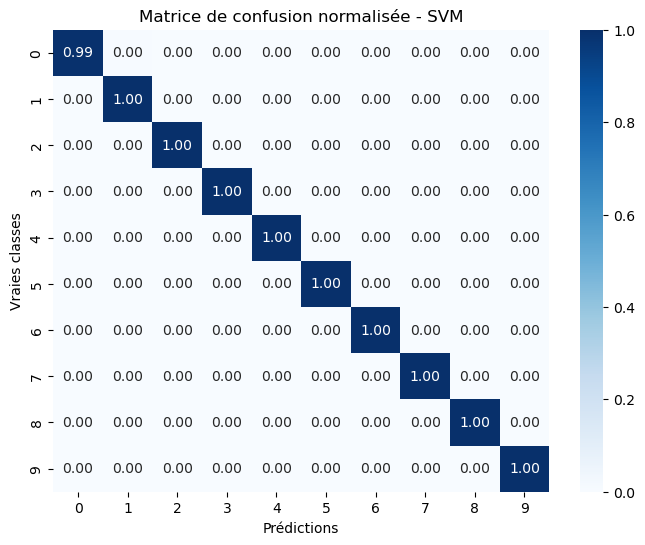

In [191]:
cm = confusion_matrix(y_val, y_val_pred_svm, normalize="true")

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt=".2f", cmap="Blues")
plt.xlabel("Prédictions")
plt.ylabel("Vraies classes")
plt.title("Matrice de confusion normalisée - SVM")
plt.show()

La matrice de confusion montre une forte concentration des prédictions sur la diagonale, indiquant une excellente performance globale.

#### **Conclusion intermédiaire**

Les deux modèles présentent des accuracy très élevées sur le dataset Kannada-MNIST (SVM : 98,7% et Random Forest : 98,1 %). Les scores de validation croisée sont proches des scores de validation finale pour les deux modèles :

- SVM : CV ≈ 98,4 % / Validation ≈ 98,7 %
- RF : CV ≈ 97,7 % / Validation ≈ 98,1 %

Bien que le SVM présente la meilleure performance globale, l’écart avec le Random Forest reste faible. Le choix du modèle dépend donc du compromis recherché :

- Si l’objectif est la performance maximale, le SVM est retenu
- Si l’on privilégie la robustesse et l’interprétabilité, le Random Forest constitue une alternative très pertinente

Dans le cadre de ce projet, **le SVM est sélectionné comme modèle final** en raison de sa performance légèrement supérieure et de sa très bonne capacité de généralisation.

# V. Évaluation du modèle final et analyse critique des performances
Une fois les hyperparamètres optimaux déterminés, le modèle est ré-entraîné sur l’ensemble complet des données d’apprentissage afin d’exploiter toute l’information disponible et d’améliorer la capacité de généralisation avant l’application au jeu de test final. L’**absence de labels** dans le jeu de test ne permet toutefois pas de calculer directement l’erreur finale

In [193]:
# Ré-entraînement sur toutes les données labelisées
best_svm_model.fit(X, y)

# prédictions avec le meilleur svm
y_test_pred  = best_svm_model.predict(X_test)

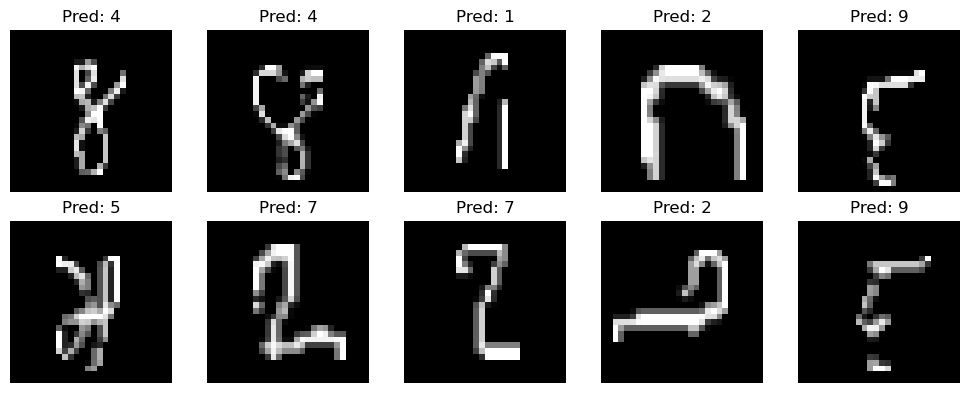

In [195]:
# Visualisation 
indices = np.random.choice(len(X_test), 10, replace=False) # 10 images aléatoires

plt.figure(figsize=(10,4))

for i, idx in enumerate(indices):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap="gray")
    plt.title(f"Pred: {y_test_pred[idx]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

L’observation des images montre que le modèle identifie correctement la majorité des chiffres manuscrits, même lorsque l’écriture présente de légères irrégularités.

# Conclusion générale
Ce travail avait pour objectif de mettre en œuvre et comparer plusieurs modèles de classification appliqués à la reconnaissance de chiffres manuscrits. Deux approches ont été étudiées  une Random Forest et un Support Vector Machine (SVM).

Les deux modèles ont fait l’objet d’une optimisation des hyperparamètres via validation croisée stratifiée, garantissant une sélection objective et reproductible. Les performances obtenues sur l’ensemble de validation interne sont élevées (≈ 98 % d’accuracy), avec des matrices de confusion fortement diagonales, indiquant une excellente capacité de classification et une bonne homogénéité entre les classes.

La comparaison des scores d’apprentissage et de validation ne met pas en évidence de surapprentissage significatif, ce qui confirme la bonne capacité de généralisation des modèles. L’analyse des importances des variables (Random Forest) et l’étude qualitative des prédictions (SVM) montrent que les modèles exploitent efficacement la structure géométrique des chiffres.

Au terme de l’analyse, les deux approches présentent des **performances comparables**, le SVM offrant une séparation plus théorique en haute dimension, tandis que la Random Forest se distingue par sa robustesse et son interprétabilité.
